In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import numpy as np

In [2]:
import gm.match as gmatch
import gm.node as gnode
import gm.plot as gplot
import gm.stat as gstat

## Configuration

In [3]:
class config:
    two_way = True
    algo = 'umeyama'
    use_node = gnode.node_square_dists
    attr = 'v'

datapath = './data/IAM_database/Letter/'

## Pair Matching

In [4]:
level = 'LOW'
[G_train,pos_train,y_train] = np.load(datapath+'letter_train_'+level+'.npy',allow_pickle=True)

In [5]:
figspath = f'./../figures/iam_database/letter/{level}/edge_and_node/'

In [6]:
#np.random.randint(0,len(G_train),2)
i1,i2 = 0, 101

G1,G2 = G_train[i1],G_train[i2]
pos1,pos2 = pos_train[i1],pos_train[i2]

**$\lambda = 0$, not use node attribute**

2.23606797749979 1.0 [2 1 3 5 4 0]


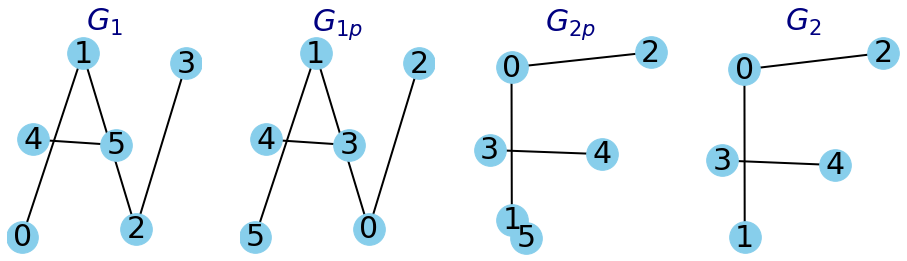

In [8]:
w = 0
G1p,G2p,p,d, d0 = gmatch.match_extended_nx(G1,G2,two_way=config.two_way,use_node =config.use_node,w=w,attr=config.attr,algo=config.algo)
print(d0,d,p)

pos1p = gnode.node_vec_pos(G1p)
pos2p = gnode.node_vec_pos(G2p)

options = {'node_size':1000,'font_size':30}

wd,nplt = 16, 4
plt.figure(figsize=(wd,wd/4.))
plt.subplot(1,nplt,1)
gplot.draw_weighted(G1,title=r'$G_1$',pos=pos1,width_factor=2,**options)
plt.subplot(1,nplt,2)
gplot.draw_weighted(G1p,title=r'$G_{1p}$',pos=pos1p,width_factor=2,**options)
plt.subplot(1,nplt,3)
gplot.draw_weighted(G2p,title=r'$G_{2p}$',pos=pos2p,width_factor=2,**options)
plt.subplot(1,nplt,4)
gplot.draw_weighted(G2,title=r'$G_2$',pos=pos2,width_factor=2,**options)
if w>0 and w<1:
    ex_nums = '{:03}_{:03}_0d{}'.format(i1,i2,int(w*10))
else:
    ex_nums = '{:03}_{:03}_{}'.format(i1,i2,w)
# plt.savefig(figspath+ex_nums+'.eps')

**$\lambda = 0.5$**

3.15915777748097 1.59710202323881 [1 0 2 4 5 3]


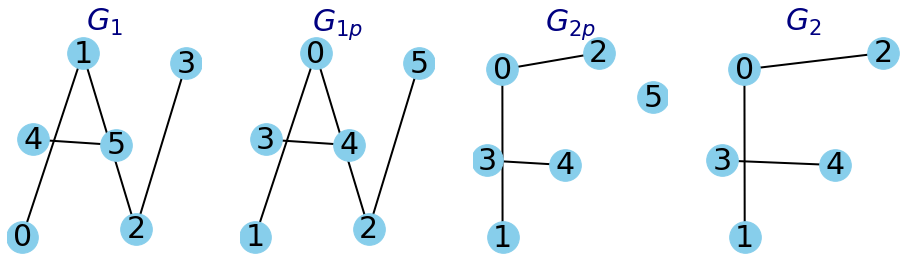

In [9]:
w = 0.5
G1p,G2p,p,d, d0 = gmatch.match_extended_nx(G1,G2,two_way=config.two_way,use_node =config.use_node,w=w,attr=config.attr,algo=config.algo)
print(d0,d,p)

pos1p = gnode.node_vec_pos(G1p)
pos2p = gnode.node_vec_pos(G2p)

wd,nplt = 16, 4
plt.figure(figsize=(wd,wd/4.))
plt.subplot(1,nplt,1)
gplot.draw_weighted(G1,title=r'$G_1$',pos=pos1, width_factor = 2,**options)
plt.subplot(1,nplt,2)
gplot.draw_weighted(G1p,title=r'$G_{1p}$',pos=pos1p, width_factor = 2,**options)
plt.subplot(1,nplt,3)
gplot.draw_weighted(G2p,title=r'$G_{2p}$',pos=pos2p, width_factor = 2,**options)
plt.subplot(1,nplt,4)
gplot.draw_weighted(G2,title=r'$G_2$',pos=pos2, width_factor = 2,**options)
if w>0 and w<1:
    ex_nums = '{:03}_{:03}_0d{}'.format(i1,i2,int(w*10))
else:
    ex_nums = '{:03}_{:03}_{}'.format(i1,i2,w)
# plt.savefig(figspath+ex_nums+'.eps')

**$\lambda = 1$**

4.992104911965894 2.1175538334441466 [1 0 6 4 5 3 2]


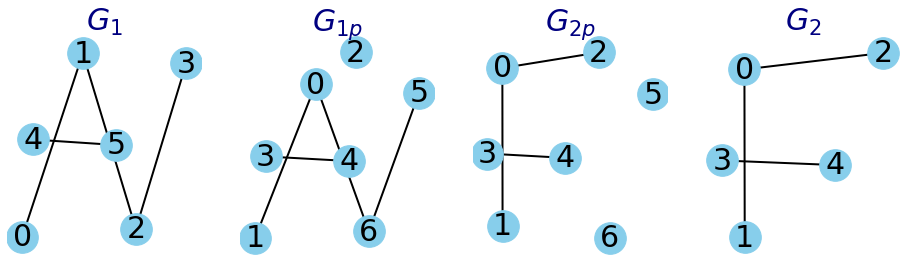

In [10]:
w = 1
G1p,G2p,p,d, d0 = gmatch.match_extended_nx(G1,G2,two_way=config.two_way,use_node =config.use_node,w=w,attr=config.attr,algo=config.algo)
print(d0,d,p)

pos1p = gnode.node_vec_pos(G1p)
pos2p = gnode.node_vec_pos(G2p)

wd,nplt = 16, 4
plt.figure(figsize=(wd,wd/4.))
plt.subplot(1,nplt,1)
gplot.draw_weighted(G1,title=r'$G_1$',pos=pos1, width_factor = 2,**options)
plt.subplot(1,nplt,2)
gplot.draw_weighted(G1p,title=r'$G_{1p}$',pos=pos1p, width_factor = 2,**options)
plt.subplot(1,nplt,3)
gplot.draw_weighted(G2p,title=r'$G_{2p}$',pos=pos2p, width_factor = 2,**options)
plt.subplot(1,nplt,4)
gplot.draw_weighted(G2,title=r'$G_2$',pos=pos2, width_factor = 2,**options)
if w>0 and w<1:
    ex_nums = '{:03}_{:03}_0d{}'.format(i1,i2,int(w*10))
else:
    ex_nums = '{:03}_{:03}_{}'.format(i1,i2,w)
# plt.savefig(figspath+ex_nums+'.eps')

## Geodesic

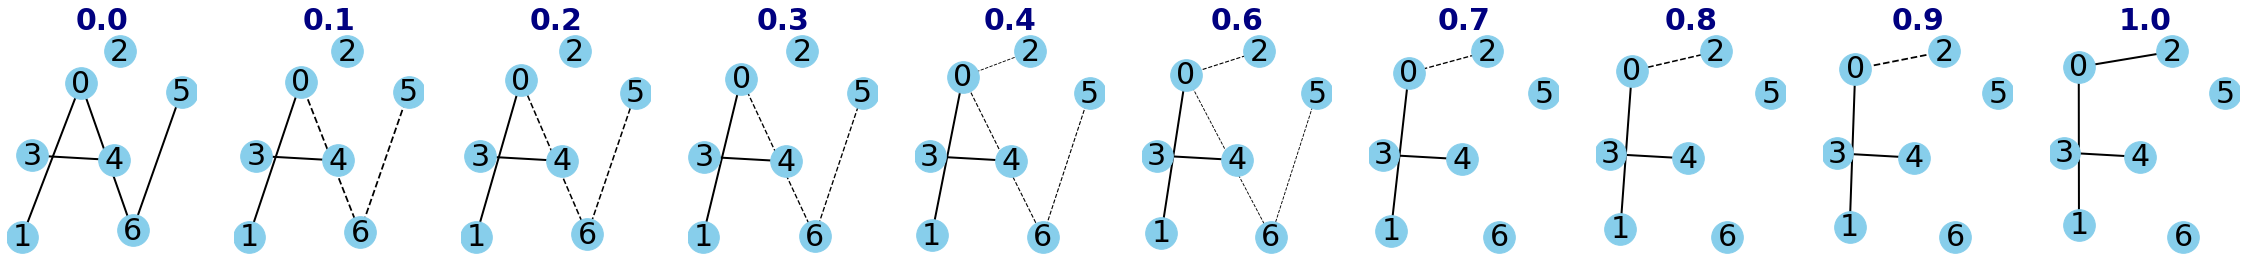

In [11]:
A1 = nx.to_numpy_matrix(G1p)
A2 = nx.to_numpy_matrix(G2p)
A1p = gmatch.permutate_adjmat(p,A1)

A_geod, G_geod, pos_geo = [], [], []
M = 10
s = np.linspace(0,1,M)
for i in range(M):
    A_geod.append((1-s[i])*A1p + s[i]*A2 )
    G_geod.append( nx.from_numpy_matrix(A_geod[-1]) )
    pos_geoi = dict()
    for k in pos1p:
        pos_geoi[k] = ((1-s[i])*pos1p[k][0]+s[i]*pos2p[k][0], (1-s[i])*pos1p[k][1]+s[i]*pos2p[k][1])
    pos_geo.append(pos_geoi)

plt.figure(figsize=(40,4))
gt1,gt2 = .9,.4
for i in range(M):
    plt.subplot(1,M,i+1)
    gplot.draw_weighted(G_geod[i],str(round(s[i],1)),pos=pos_geo[i],width_factor=2,thr=gt1,thr2=gt2,**options)
# plt.savefig(figspath+ex_nums+'_geo.eps')

**Linear Interpolation**

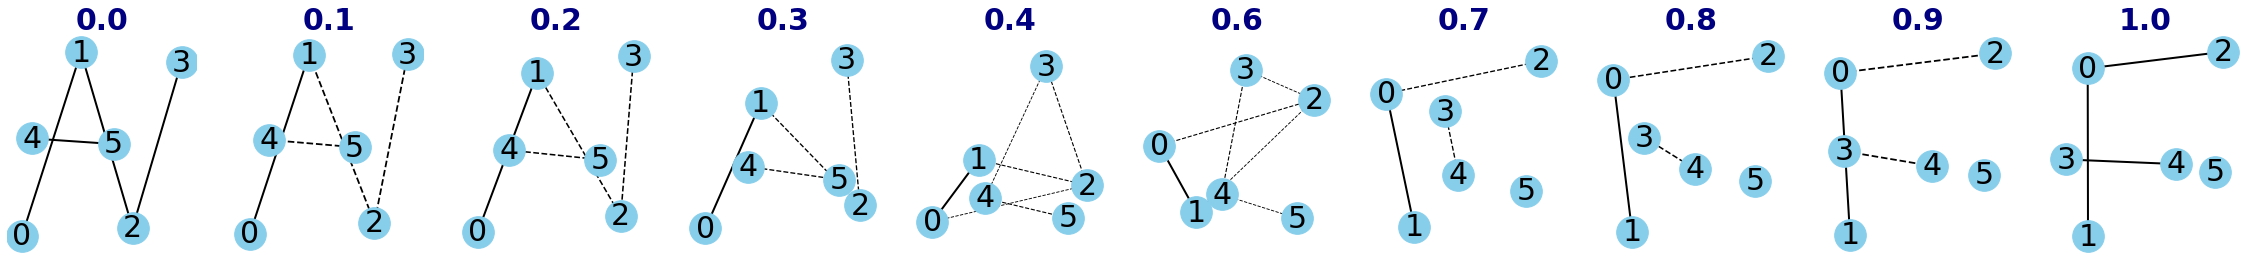

In [12]:
A1 = nx.to_numpy_matrix(G1)
A2 = nx.to_numpy_matrix(G2)

n1, n2 = len(A1), len(A2)
temp = np.zeros(shape = (max(n1,n2),max(n1,n2)))
if n1>n2:
    temp[:n2,:n2] = A2.copy()
    A2 = temp.copy()
    for i in range(n2,n1):
        pos2[i] = pos1[i]
elif n1<n2:
    temp[:n1,:n1] = A1.copy()
    A1 = temp.copy()
    for i in range(n1,n2):
        pos1[i] = pos2[i]

A_geod, G_geod, pos_geo = [], [], []
for i in range(M):
    A_geod.append((1-s[i])*A1 + s[i]*A2 )
    G_geod.append( nx.from_numpy_matrix(A_geod[-1]) )
    pos_geoi = dict()
    for k in pos1:
        pos_geoi[k] = ((1-s[i])*pos1[k][0]+s[i]*pos2[k][0], (1-s[i])*pos1[k][1]+s[i]*pos2[k][1])
    pos_geo.append(pos_geoi)

plt.figure(figsize=(40,4))
gt1,gt2 = .9,.4
for i in range(M):
    plt.subplot(1,M,i+1)
    gplot.draw_weighted(G_geod[i],str(round(s[i],1)), pos=pos_geo[i], width_factor=2,thr=gt1,thr2=gt2,**options)
# plt.savefig(figspath+ex_nums+'_interp.eps')

## Statistical Analysis

In [4]:
config.two_way = False

plt.rcParams.update({'font.size': 18})

### LOW

In [5]:
level = 'LOW'
[G_train,pos_train,y_train] = np.load(datapath+'letter_train_'+level+'.npy',allow_pickle=True)

### Overall

In [6]:
w = 1
M = 5
muG,Gp,E,mu_list, P = gstat.iterative_mean_graph_ext_nx(G_train,max_itr=M,two_way=config.two_way, 
                                                        use_node =config.use_node,w=w,num_attr = True,attr ='v',
                                                        algo=config.algo)

first pass: muG has 8 nodes
first pass time: 3.28s
starting iteration 1/5, muG has 8 nodes
finished iteration 1/5 and time so far 5.65s
starting iteration 2/5, muG has 8 nodes
finished iteration 2/5 and time so far 8.81s
starting iteration 3/5, muG has 8 nodes
finished iteration 3/5 and time so far 11.66s
starting iteration 4/5, muG has 8 nodes
finished iteration 4/5 and time so far 14.60s
starting iteration 5/5, muG has 8 nodes
finished iteration 5/5 and time so far 17.41s


In [7]:
pca,scores,V= gstat.pcaG_aligned(Gp,attr='v')

graphs are equal size


In [8]:
y = y_train.astype(int)

y_map = {'A':0, 'E':1, 'F':2, 'H':3, 'I':4, 'K':5, 'L':6, 'M':7, 'N':8,
         'T':9, 'V':10, 'W':11, 'X':12, 'Y':13, 'Z':14}
y_inv = {v:k for (k,v) in y_map.items()}

Text(0, 0.5, 'PC2')

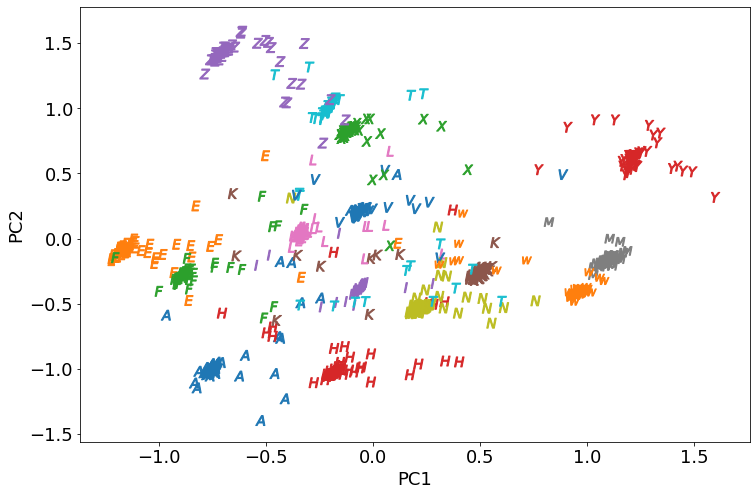

In [10]:
plt.figure(figsize=(12,8))
for i in range(0,15):    
    plt.scatter(scores[y==i,0],scores[y==i,1],marker=f'${y_inv[i]}$',s=[100]*50)
plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.savefig(figspath+'pc12.eps')

### A

In [21]:
G = G_train[y_train==0]
pos = pos_train[y_train==0]

figspath += 'A/'

**Sample Graphs**

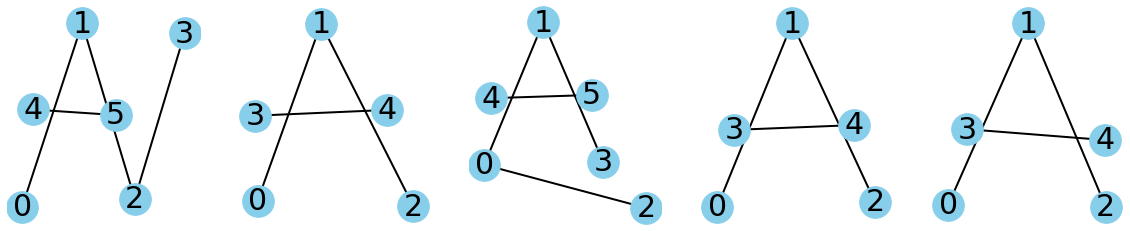

In [22]:
nr,nc = 1,5
wd = 20
sz11 = (wd,1.*wd*nr/nc)
plt.figure('Sample Graphs',sz11)
for k in range(nr*nc):
    plt.subplot(nr,nc,k+1)
    gplot.draw_weighted(G[k],pos=pos[k],width_factor=2,**options)
# plt.savefig(figspath+'sample_graphs.eps')

**Mean**

In [23]:
w = 1
M = 5
muG,Gp,E,mu_list, P = gstat.iterative_mean_graph_ext_nx(G,max_itr=M,two_way=config.two_way, 
                                                        use_node =config.use_node,w=w,num_attr = True,attr ='v',
                                                        algo=config.algo)

first pass: muG has 7 nodes
first pass time: 0.13s
starting iteration 1/5, muG has 7 nodes
finished iteration 1/5 and time so far 0.14s
starting iteration 2/5, muG has 7 nodes
finished iteration 2/5 and time so far 0.27s
starting iteration 3/5, muG has 7 nodes
finished iteration 3/5 and time so far 0.40s
starting iteration 4/5, muG has 7 nodes
finished iteration 4/5 and time so far 0.53s
starting iteration 5/5, muG has 7 nodes
finished iteration 5/5 and time so far 0.67s


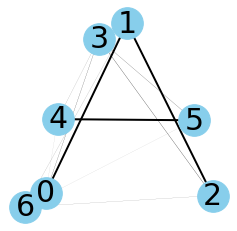

In [24]:
plt.figure(figsize=(4,4))
gplot.draw_weighted(muG,pos=gnode.node_vec_pos(muG),width_factor=2,**options)
# plt.savefig(figspath+'mean.png')

Text(0, 0.5, 'Energy')

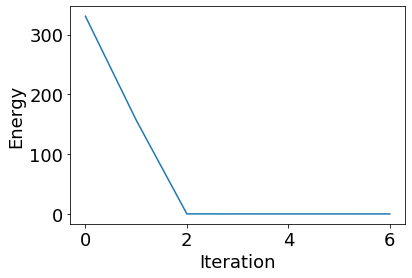

In [25]:
plt.figure()
plt.plot(E)
plt.xlabel('Iteration')
plt.ylabel('Energy')
# plt.savefig(figspath+'energy_vs_iteration.eps')

**PCA**

In [26]:
pca,scores, V= gstat.pcaG_aligned(Gp)
#plt.plot(np.cumsum([0]+list(pca.explained_variance_ratio_)))
pc_sd = np.sqrt(pca.explained_variance_)

#muG_scores = um.pca_graphs_to_scores(pca,[muG])

n = muG.number_of_nodes()
d = muG.nodes[0]['v'].size

scores_vec1d = np.arange(-2,2.01,1)
pc_nGraphs = scores_vec1d.size

pc1_scores = np.zeros((pc_nGraphs,1))
pc1_scores[:,0] = scores_vec1d*pc_sd[0]
pc1_graphs = gstat.pca_scores_to_graphs(pca,pc1_scores,n,d)

pc2_scores = np.zeros((pc_nGraphs,2))
pc2_scores[:,1] = scores_vec1d*pc_sd[1]
pc2_graphs = gstat.pca_scores_to_graphs(pca,pc2_scores,n,d)

pc3_scores = np.zeros((pc_nGraphs,3))
pc3_scores[:,2] = scores_vec1d*pc_sd[2]
pc3_graphs = gstat.pca_scores_to_graphs(pca,pc3_scores,n,d)

graphs are equal size


Text(0, 0.5, 'Explained Variation')

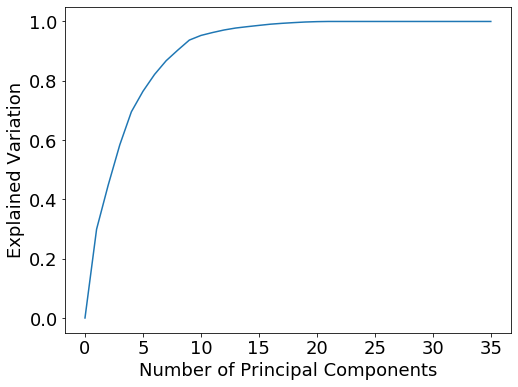

In [27]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum([0]+list(pca.explained_variance_ratio_)))
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variation')
# plt.savefig(figspath+'pca_cumvar.eps')

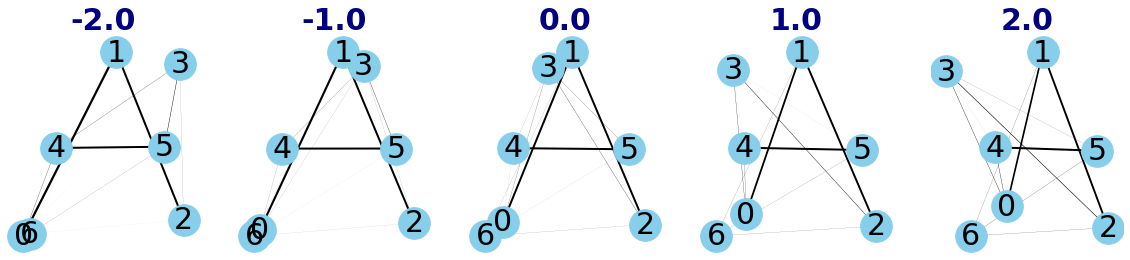

In [28]:
plt.figure('PC1',figsize=(20,4))
pc1_pos = list(map(gnode.node_vec_pos,pc1_graphs))
for k in range(pc_nGraphs):
    plt.subplot(1,pc_nGraphs,k+1)
    gplot.draw_weighted(pc1_graphs[k],
                     title=str(scores_vec1d[k]),
                     pos=pc1_pos[k],width_factor=2,**options)
# plt.savefig(figspath+'pc1.png')

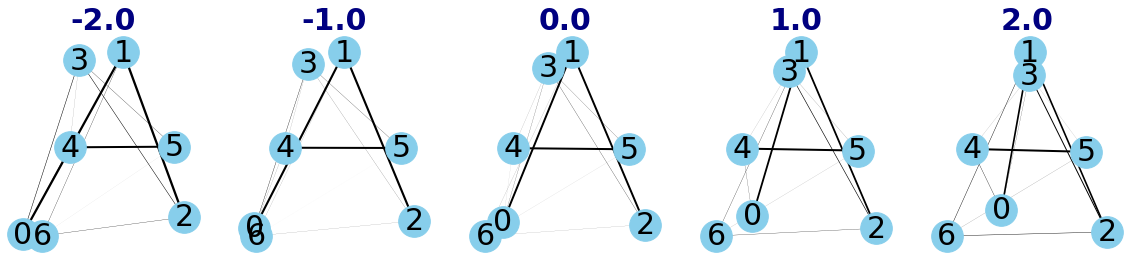

In [29]:
plt.figure('PC2',figsize=(20,4))
pc2_pos = list(map(gnode.node_vec_pos,pc2_graphs))
for k in range(pc_nGraphs):
    plt.subplot(1,pc_nGraphs,k+1)
    gplot.draw_weighted(pc2_graphs[k],
                     title=str(scores_vec1d[k]),
                     pos=pc2_pos[k],width_factor=2,**options)
# plt.savefig(figspath+'pc2.png')

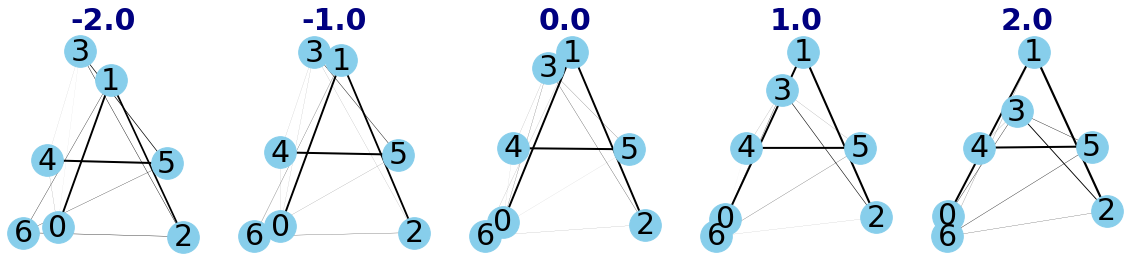

In [30]:
plt.figure('PC3',figsize=(20,4))
pc3_pos = list(map(gnode.node_vec_pos,pc3_graphs))
for k in range(pc_nGraphs):
    plt.subplot(1,pc_nGraphs,k+1)
    gplot.draw_weighted(pc3_graphs[k],
                     title=str(scores_vec1d[k]),
                     pos=pc3_pos[k],width_factor=2,**options)
# plt.savefig(figspath+'pc3.png')

In [31]:
p70,p80,p90=None,None,None
for i in range(1,35):
    tmp = sum(pca.explained_variance_ratio_[0:i])
    #print(i,tmp)
    if tmp>0.7 and not p70:
        p70 = i
    if tmp>0.8 and not p80:
        p80 = i
    if tmp>0.9 and not p90:
        p90 = i
        
print(p70,p80,p90)

5 6 8


**Gaussian Model**

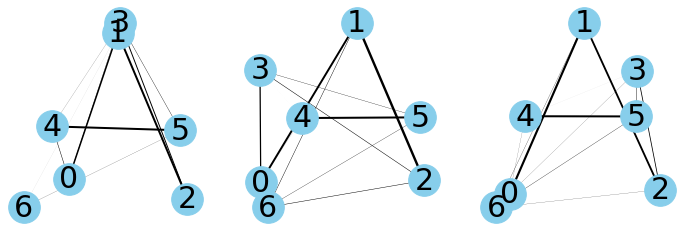

In [33]:
mu = np.mean(scores[:,:p80],axis = 0)
C = np.cov(scores[:,:p80],rowvar =False)

#np.random.seed(2019)
rs = np.random.multivariate_normal(mu,C,3)

Grs = gstat.pca_scores_to_graphs(pca,rs,muG.number_of_nodes(),d)

pos_grs = list(map(gnode.node_vec_pos,Grs))

plt.figure('Random Sample',figsize=(12,4))
for k in range(len(Grs)):
    plt.subplot(1,3,k+1)
    gplot.draw_weighted(Grs[k],pos=pos_grs[k],width_factor=2,**options)
# plt.savefig(figspath+'randomsample.png')

### MED

In [34]:
level = 'MED'
[G_train,pos_train,y_train] = np.load(datapath+'letter_train_'+level+'.npy',allow_pickle=True)

In [35]:
figspath = f'./../figures/iam_database/letter/{level}/edge_and_node/'

In [36]:
G = G_train[y_train==0]
pos = pos_train[y_train==0]

figspath += 'A/'

**Sample Graphs**

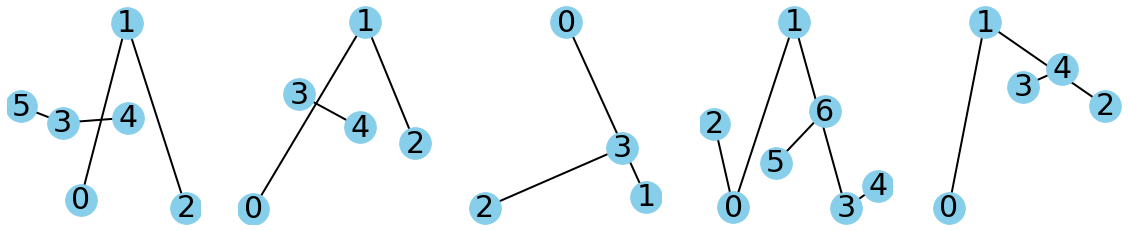

In [37]:
nr,nc = 1,5
wd = 20
sz11 = (wd,1.*wd*nr/nc)
plt.figure('Sample Graphs',sz11)
for k in range(nr*nc):
    plt.subplot(nr,nc,k+1)
    gplot.draw_weighted(G[k],pos=pos[k],width_factor=2,**options)
# plt.savefig(figspath+'sample_graphs.eps')

**Mean**

In [38]:
w = 1
M = 5
muG,Gp,E,mu_list, P = gstat.iterative_mean_graph_ext_nx(G, max_itr=M, 
                                                        use_node =config.use_node,w=w,
                                                        num_attr = True,attr ='v')

first pass: muG has 7 nodes
first pass time: 0.17s
starting iteration 1/5, muG has 7 nodes
finished iteration 1/5 and time so far 0.14s
starting iteration 2/5, muG has 7 nodes
finished iteration 2/5 and time so far 0.28s
starting iteration 3/5, muG has 7 nodes
finished iteration 3/5 and time so far 0.42s
starting iteration 4/5, muG has 7 nodes
finished iteration 4/5 and time so far 0.56s
starting iteration 5/5, muG has 7 nodes
finished iteration 5/5 and time so far 0.70s


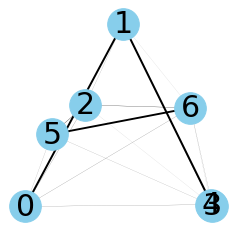

In [39]:
posmu = gnode.node_vec_pos(muG)
plt.figure('Final Mean',figsize=(4,4))
gplot.draw_weighted(muG,pos=posmu,width_factor=2,**options)
# plt.savefig(figspath+'mean.png')

Text(0, 0.5, 'Energy')

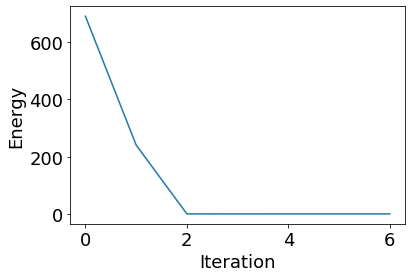

In [40]:
plt.figure('Energy vs. Iteration')
plt.plot(E)
plt.xlabel('Iteration')
plt.ylabel('Energy')
# plt.savefig(figspath+'energy_vs_iteration.eps')

**PCA**

In [41]:
pca,scores, V= gstat.pcaG_aligned(Gp)
#plt.plot(np.cumsum([0]+list(pca.explained_variance_ratio_)))
pc_sd = np.sqrt(pca.explained_variance_)

#muG_scores = um.pca_graphs_to_scores(pca,[muG])

n = muG.number_of_nodes()
d = muG.nodes[0]['v'].size

scores_vec1d = np.arange(-2,2.01,1)
pc_nGraphs = scores_vec1d.size

pc1_scores = np.zeros((pc_nGraphs,1))
pc1_scores[:,0] = scores_vec1d*pc_sd[0]
pc1_graphs = gstat.pca_scores_to_graphs(pca,pc1_scores,n,d)

pc2_scores = np.zeros((pc_nGraphs,2))
pc2_scores[:,1] = scores_vec1d*pc_sd[1]
pc2_graphs = gstat.pca_scores_to_graphs(pca,pc2_scores,n,d)

pc3_scores = np.zeros((pc_nGraphs,3))
pc3_scores[:,2] = scores_vec1d*pc_sd[2]
pc3_graphs = gstat.pca_scores_to_graphs(pca,pc3_scores,n,d)

graphs are equal size


Text(0, 0.5, 'Explained Variation')

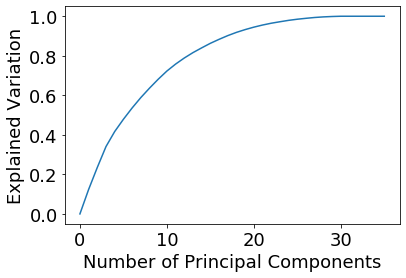

In [42]:
plt.figure()
plt.plot(np.cumsum([0]+list(pca.explained_variance_ratio_)))
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variation')
# plt.savefig(figspath+'pca_cumvar.eps')

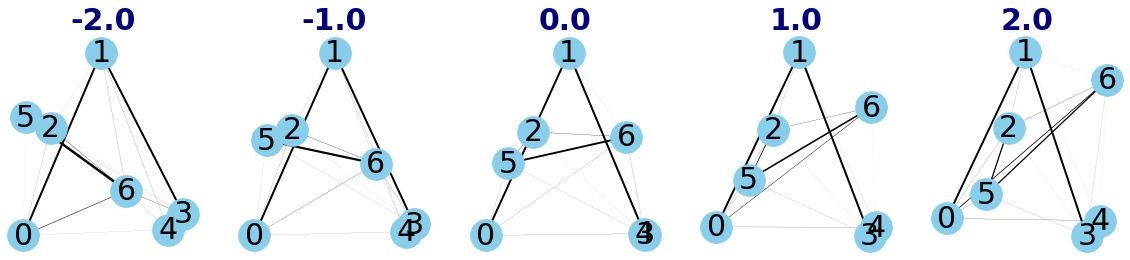

In [43]:
plt.figure('PC1',figsize=(20,4))
pc1_pos = list(map(gnode.node_vec_pos,pc1_graphs))
for k in range(pc_nGraphs):
    plt.subplot(1,pc_nGraphs,k+1)
    gplot.draw_weighted(pc1_graphs[k],title=str(scores_vec1d[k]),pos=pc1_pos[k],width_factor=2,**options)
# plt.savefig(figspath+'pc1.png')

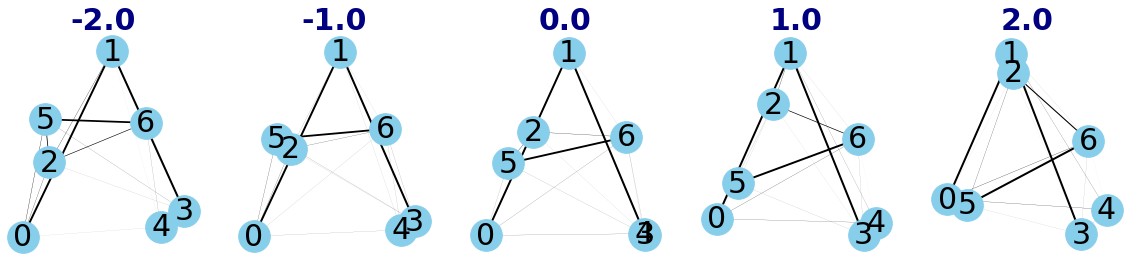

In [44]:
plt.figure('PC2',figsize=(20,4))
pc2_pos = list(map(gnode.node_vec_pos,pc2_graphs))
for k in range(pc_nGraphs):
    plt.subplot(1,pc_nGraphs,k+1)
    gplot.draw_weighted(pc2_graphs[k],title=str(scores_vec1d[k]),pos=pc2_pos[k],width_factor=2,**options)
# plt.savefig(figspath+'pc2.png')

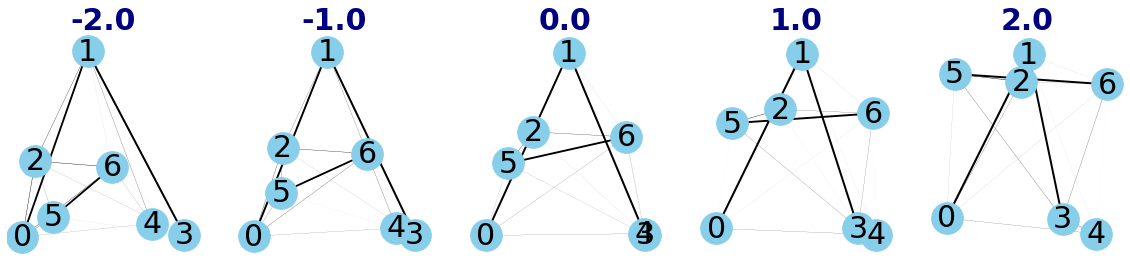

In [45]:
plt.figure('PC1',figsize=(20,4))
pc3_pos = list(map(gnode.node_vec_pos,pc3_graphs))
for k in range(pc_nGraphs):
    plt.subplot(1,pc_nGraphs,k+1)
    gplot.draw_weighted(pc3_graphs[k],title=str(scores_vec1d[k]),pos=pc3_pos[k],width_factor=2,**options)
# plt.savefig(figspath+'pc3.png')

In [46]:
p70,p80,p90=None,None,None
for i in range(1,35):
    tmp = sum(pca.explained_variance_ratio_[0:i])
    #print(i,tmp)
    if tmp>0.7 and not p70:
        p70 = i
    if tmp>0.8 and not p80:
        p80 = i
    if tmp>0.9 and not p90:
        p90 = i
        

print(p70,p80,p90)

10 13 17


**Gaussian Model**

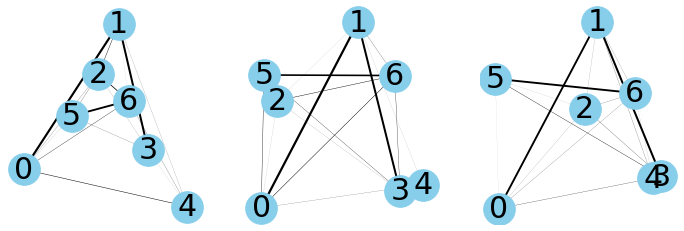

In [47]:
mu = np.mean(scores[:,:p80],axis = 0)
C = np.cov(scores[:,:p80],rowvar =False)

#np.random.seed(2019)
rs = np.random.multivariate_normal(mu,C,3)

Grs = gstat.pca_scores_to_graphs(pca,rs,muG.number_of_nodes(),d)

pos_grs = list(map(gnode.node_vec_pos,Grs))

plt.figure('Random Sample',figsize=(12,4))
for k in range(len(Grs)):
    plt.subplot(1,3,k+1)
    gplot.draw_weighted(Grs[k],pos=pos_grs[k],width_factor=2,**options)
# plt.savefig(figspath+'randomsample.png')

### HIGH

In [48]:
level = 'HIGH'
[G_train,pos_train,y_train] = np.load(datapath+'letter_train_'+level+'.npy',allow_pickle=True)

In [49]:
figspath = f'./../figures/iam_database/letter/{level}/edge_and_node/'

In [50]:
G = G_train[y_train==0]
pos = pos_train[y_train==0]

figspath += 'A/'

**Sample Graphs**

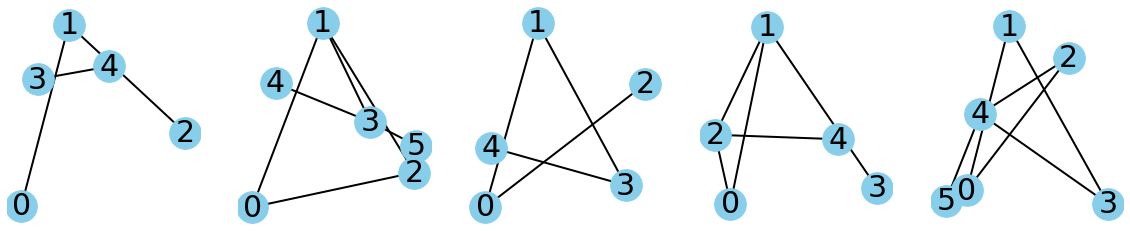

In [51]:
nr,nc = 1,5
wd = 20
sz11 = (wd,1.*wd*nr/nc)
plt.figure('Sample Graphs',sz11)
for k in range(nr*nc):
    plt.subplot(nr,nc,k+1)
    gplot.draw_weighted(G[k],pos=pos[k],width_factor=2,**options)
# plt.savefig(figspath+'sample_graphs.eps')

**Mean**

In [52]:
w = 1
M = 5
muG,Gp,E,mu_list, P = gstat.iterative_mean_graph_ext_nx(G, max_itr=M, 
                                                  use_node =config.use_node,w=w,
                                                  num_attr = True,attr ='v')

first pass: muG has 7 nodes
first pass time: 0.19s
starting iteration 1/5, muG has 7 nodes
finished iteration 1/5 and time so far 0.15s
starting iteration 2/5, muG has 7 nodes
finished iteration 2/5 and time so far 0.31s
starting iteration 3/5, muG has 7 nodes
finished iteration 3/5 and time so far 0.46s
starting iteration 4/5, muG has 7 nodes
finished iteration 4/5 and time so far 0.62s
starting iteration 5/5, muG has 7 nodes
finished iteration 5/5 and time so far 0.77s


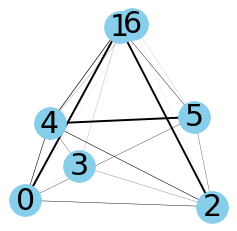

In [53]:
posmu = gnode.node_vec_pos(muG)
plt.figure('Final Mean',figsize=(4.,4))
gplot.draw_weighted(muG,pos=posmu,width_factor=2,**options)
# plt.savefig(figspath+'mean.png')

Text(0, 0.5, 'Energy')

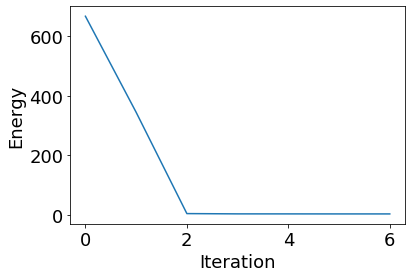

In [54]:
plt.figure('Energy vs. Iteration')
plt.plot(E)
plt.xlabel('Iteration')
plt.ylabel('Energy')

**PCA**

In [118]:
pca,scores, V= gstat.pcaG_aligned(Gp)
#plt.plot(np.cumsum([0]+list(pca.explained_variance_ratio_)))
pc_sd = np.sqrt(pca.explained_variance_)

#muG_scores = um.pca_graphs_to_scores(pca,[muG])

n = muG.number_of_nodes()
d = muG.nodes[0]['v'].size

scores_vec1d = np.arange(-2,2.01,1)
pc_nGraphs = scores_vec1d.size

pc1_scores = np.zeros((pc_nGraphs,1))
pc1_scores[:,0] = scores_vec1d*pc_sd[0]
pc1_graphs = gstat.pca_scores_to_graphs(pca,pc1_scores,n,d)

pc2_scores = np.zeros((pc_nGraphs,2))
pc2_scores[:,1] = scores_vec1d*pc_sd[1]
pc2_graphs = gstat.pca_scores_to_graphs(pca,pc2_scores,n,d)

pc3_scores = np.zeros((pc_nGraphs,3))
pc3_scores[:,2] = scores_vec1d*pc_sd[2]
pc3_graphs = gstat.pca_scores_to_graphs(pca,pc3_scores,n,d)

graphs are equal size


Text(0, 0.5, 'Explained Variation')

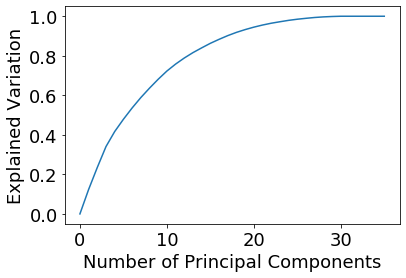

In [55]:
plt.figure()
plt.plot(np.cumsum([0]+list(pca.explained_variance_ratio_)))
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variation')
# plt.savefig(figspath+'pca_cumvar.eps')

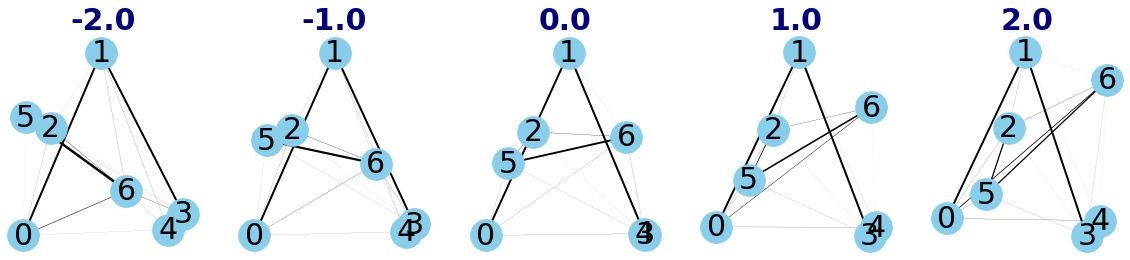

In [56]:
plt.figure('PC1',figsize=(20,4))
pc1_pos = list(map(gnode.node_vec_pos,pc1_graphs))
for k in range(pc_nGraphs):
    plt.subplot(1,pc_nGraphs,k+1)
    gplot.draw_weighted(pc1_graphs[k],
                     title=str(scores_vec1d[k]),
                     pos=pc1_pos[k],width_factor=2,**options)
# plt.savefig(figspath+'pc1.png')

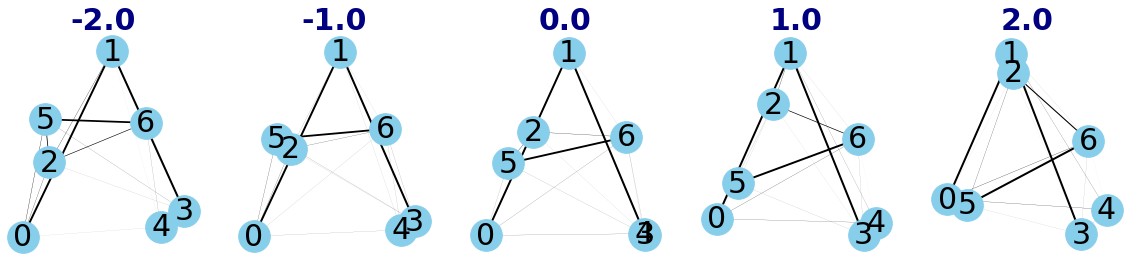

In [57]:
plt.figure('PC2',figsize=(20,4))
pc2_pos = list(map(gnode.node_vec_pos,pc2_graphs))
for k in range(pc_nGraphs):
    plt.subplot(1,pc_nGraphs,k+1)
    gplot.draw_weighted(pc2_graphs[k],
                     title=str(scores_vec1d[k]),
                     pos=pc2_pos[k],width_factor=2,**options)
# plt.savefig(figspath+'pc2.png')

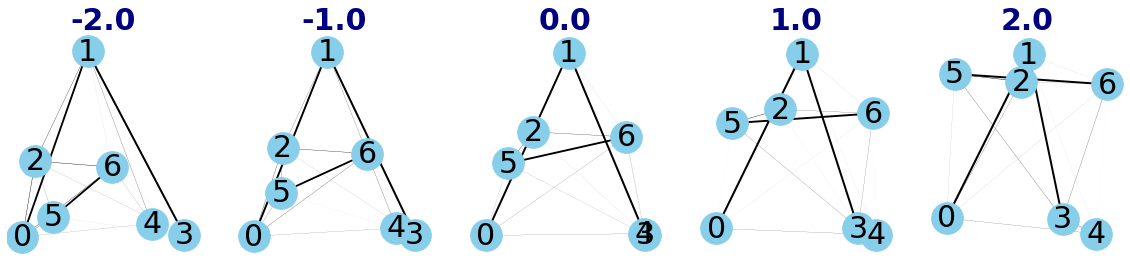

In [58]:
plt.figure('PC3',figsize=(20,4))
pc3_pos = list(map(gnode.node_vec_pos,pc3_graphs))
for k in range(pc_nGraphs):
    plt.subplot(1,pc_nGraphs,k+1)
    gplot.draw_weighted(pc3_graphs[k],
                     title=str(scores_vec1d[k]),
                     pos=pc3_pos[k],width_factor=2,**options)
# plt.savefig(figspath+'pc3.png')

In [59]:
p70,p80,p90=None,None,None
for i in range(1,35):
    tmp = sum(pca.explained_variance_ratio_[0:i])
    #print(i,tmp)
    if tmp>0.7 and not p70:
        p70 = i
    if tmp>0.8 and not p80:
        p80 = i
    if tmp>0.9 and not p90:
        p90 = i
        

print(p70,p80,p90)

10 13 17


**Gaussian Model**

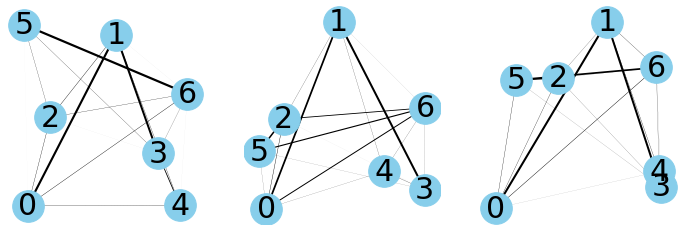

In [60]:
mu = np.mean(scores[:,:p80],axis = 0)
C = np.cov(scores[:,:p80],rowvar =False)

#np.random.seed(2019)
rs = np.random.multivariate_normal(mu,C,3)

Grs = gstat.pca_scores_to_graphs(pca,rs,muG.number_of_nodes(),d)

pos_grs = list(map(gnode.node_vec_pos,Grs))

plt.figure('Random Sample',figsize=(12,4))
for k in range(len(Grs)):
    plt.subplot(1,3,k+1)
    gplot.draw_weighted(Grs[k],
                     pos=pos_grs[k],width_factor=2,**options)
# plt.savefig(figspath+'randomsample.png')